# Tarefa: Base de dados CIFAR-10
O objetivo desta tarefa é construir um classificador para previsão dos seguintes objetos da base de dados CIFAR-10: aviões, automóveis, pássaros, gatos, veados, cachorros, sapos, cavalos, barcos e caminhões!

In [23]:
from tensorflow.keras.datasets import cifar10  # Para carregar a base de dados CIFAR-10
from sklearn.model_selection import KFold  # Para criar os folds da validação cruzada
from tensorflow.keras.utils import to_categorical  # Para converter os rótulos em formato one-hot
from tensorflow.keras.models import Sequential  # Para criar o modelo sequencial
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # Camadas da CNN
from sklearn.model_selection import train_test_split  # Para dividir os dados em treino/validação
import numpy as np  # Biblioteca para manipulação de arrays
import matplotlib.pyplot as plt  # Para visualização de imagens

In [3]:
# O conjunto já está dividido em treino (50.000 imagens) e teste (10.000 imagens)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step


In [4]:
# Os valores dos pixels variam de 0 a 255. Dividimos por 255 para que fiquem no intervalo [0, 1],
# o que ajuda a melhorar a performance do treinamento.
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [5]:
# Os rótulos são inteiros (0 a 9). Convertê-los para um formato "one-hot" facilita
# o uso com a função de perda categorical_crossentropy.
y_train = to_categorical(y_train, 10)  # 10 classes no CIFAR-10
y_test = to_categorical(y_test, 10)

In [8]:
# Reservamos 20% dos dados de treino para validação, útil para verificar o desempenho durante o treinamento.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [18]:
model = Sequential([
    # Primeira camada convolucional com 32 filtros, tamanho do kernel 3x3, e função de ativação ReLU
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # Camada de pooling para reduzir a dimensão (2x2 pool)
    MaxPooling2D((2, 2)),
    
    # Segunda camada convolucional com 64 filtros
    Conv2D(64, (3, 3), activation='relu'),
    # Outra camada de pooling
    MaxPooling2D((2, 2)),

    # Flatten para achatar a matriz 2D em um vetor 1D
    Flatten(),

    # Camada totalmente conectada (dense) com 128 neurônios e ReLU
    Dense(128, activation='relu'),
    # Dropout para evitar overfitting (desativa 50% dos neurônios durante o treinamento)
    Dropout(0.5),

    # Camada de saída com 10 neurônios (um para cada classe), ativação softmax para probabilidade
    Dense(10, activation='softmax')
])

In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Usamos o otimizador Adam, função de perda categorical_crossentropy (para múltiplas classes)
# e acurácia como métrica de avaliação.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Treinamos por 20 épocas com um batch_size de 64, validando o desempenho em X_val e y_val.
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=64)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.2645 - loss: 1.9817 - val_accuracy: 0.4560 - val_loss: 1.5325
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.4579 - loss: 1.5136 - val_accuracy: 0.5414 - val_loss: 1.3022
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5097 - loss: 1.3682 - val_accuracy: 0.5579 - val_loss: 1.2442
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5449 - loss: 1.2725 - val_accuracy: 0.6018 - val_loss: 1.1287
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5741 - loss: 1.1866 - val_accuracy: 0.6204 - val_loss: 1.0953
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6017 - loss: 1.1276 - val_accuracy: 0.6409 - val_loss: 1.0339
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6204 - loss: 1.0702 - val_accuracy: 0.6490 - val_loss: 1.0074
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6351 - loss: 1.0336 - val_acc

In [15]:
# Calculamos a perda e a acurácia no conjunto de teste, que não foi usado no treinamento.
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Acurácia no conjunto de teste: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6897 - loss: 0.9290
Acurácia no conjunto de teste: 68.61%


In [16]:
# Fazemos predições para o conjunto de teste
predictions = model.predict(X_test)
pred_labels = np.argmax(predictions, axis=1)  # Rótulos preditos
true_labels = np.argmax(y_test, axis=1)  # Rótulos verdadeiros

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


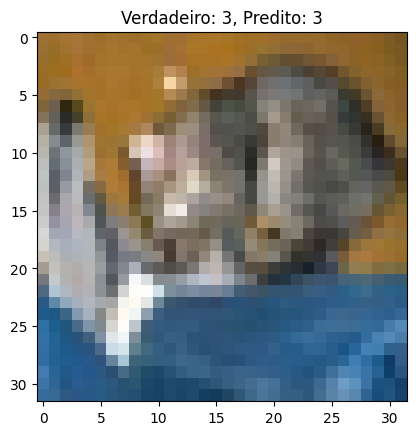

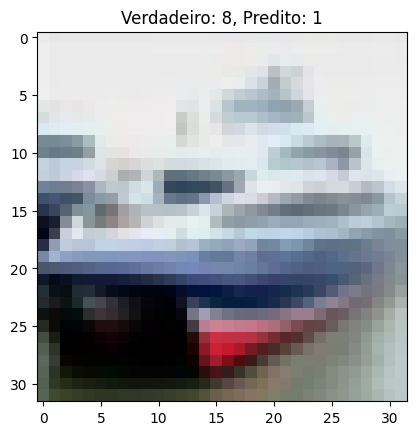

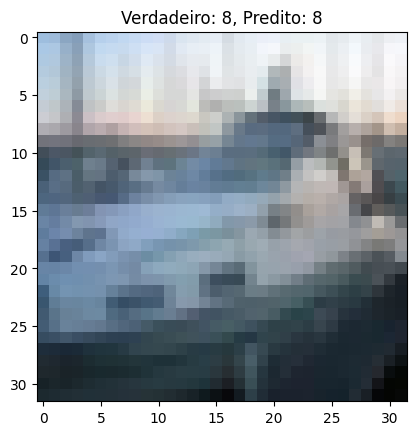

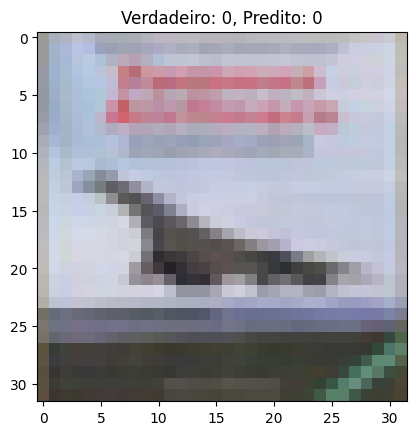

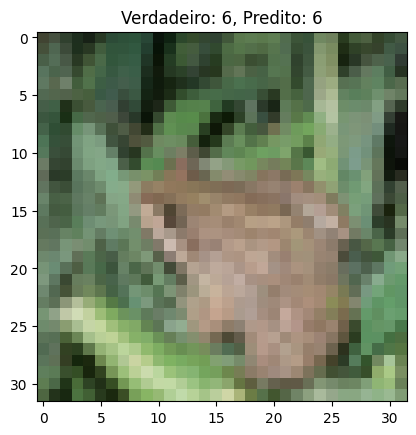

In [17]:
# Visualizamos algumas imagens, mostrando o rótulo verdadeiro e o predito
for i in range(5):  # Mostraremos 5 imagens
    plt.imshow(X_test[i])  # Exibe a imagem
    plt.title(f"Verdadeiro: {true_labels[i]}, Predito: {pred_labels[i]}")  # Título com os rótulos
    plt.show()

In [32]:
from tensorflow.keras.layers import Input  # Para definir a entrada do modelo
# Essa função será chamada para criar um novo modelo para cada fold
def create_model():
    model = Sequential([
        # Define explicitamente a entrada do modelo com shape (32, 32, 3)
        Input(shape=(32, 32, 3)),
        # Primeira camada convolucional: 32 filtros, tamanho do kernel 3x3, ReLU como ativação
        Conv2D(32, (3, 3), activation='relu'),

        # Camada de pooling: reduz a dimensão espacial pela metade (2x2)
        MaxPooling2D((2, 2)),

        # Segunda camada convolucional: 64 filtros, mesmo tamanho do kernel
        Conv2D(64, (3, 3), activation='relu'),
        # Outra camada de pooling para mais redução espacial
        MaxPooling2D((2, 2)),

        # Camada Flatten: transforma a matriz 2D em um vetor 1D
        Flatten(),

        # Camada totalmente conectada (dense) com 128 neurônios e ativação ReLU
        Dense(128, activation='relu'),
        # Dropout: desativa aleatoriamente 50% dos neurônios para evitar overfitting
        Dropout(0.5),

        # Camada de saída com 10 neurônios (um para cada classe)
        # A ativação softmax converte os valores em probabilidades
         Dense(10, activation='softmax')  # 10 classes de saída
    ])
      # Compilando o modelo
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [33]:
# Usamos 5 divisões (folds), embaralhando os dados antes de dividir
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [34]:
# Variáveis para armazenar informações de validação
fold_no = 1  # Contador para o número do fold
fold_accuracies = []  # Lista para armazenar as acurácias de cada fold

In [35]:
# Convertendo os rótulos para índices (se necessário) para compatibilidade com KFold
# Isso porque KFold trabalha com arrays simples, e não com o formato one-hot
y_train_indices = np.argmax(y_train, axis=1)


In [36]:
for train_idx, val_idx in kfold.split(X_train, y_train_indices):  # Itera sobre os folds
    print(f"\nTreinando no Fold {fold_no}...")

    # Separando os dados de treino e validação para o fold atual
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Criando um novo modelo para o fold atual
    model = create_model()

    # Treinando o modelo com os dados do fold atual
    history = model.fit(
        X_train_fold, y_train_fold,  # Dados de treinamento
        validation_data=(X_val_fold, y_val_fold),  # Dados de validação
        epochs=10,  # Reduzido para simplificar o exemplo
        batch_size=64,  # Número de amostras por batch
        verbose=1  # Mostra o progresso do treinamento
    )


Treinando no Fold 1...
Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.2464 - loss: 2.0410 - val_accuracy: 0.4583 - val_loss: 1.5344
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4263 - loss: 1.5660 - val_accuracy: 0.5102 - val_loss: 1.3509
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4943 - loss: 1.4082 - val_accuracy: 0.5522 - val_loss: 1.2490
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5163 - loss: 1.3382 - val_accuracy: 0.5848 - val_loss: 1.1758
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5559 - loss: 1.2385 - val_accuracy: 0.6056 - val_loss: 1.1282
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5824 - loss: 1.1760 - val_accuracy: 0.6250 - val_loss: 1.0722
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5990 - loss: 1.1340 - val_accuracy: 0.6250 - val_loss: 1.0682
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6143 -

In [38]:
 # Avaliando o modelo no conjunto de validação do fold atual
val_loss, val_acc = model.evaluate(X_val_fold, y_val_fold, verbose=0)
print(f"Fold {fold_no} - Acurácia na validação: {val_acc * 100:.2f}%")


Fold 1 - Acurácia na validação: 66.03%


In [40]:
   # Salvando a acurácia deste fold
fold_accuracies.append(val_acc)

In [41]:
 # Incrementando o contador do fold
fold_no += 1

In [42]:
mean_accuracy = np.mean(fold_accuracies)
print(f"\nAcurácia média após validação cruzada: {mean_accuracy * 100:.2f}%")


Acurácia média após validação cruzada: 66.03%


In [43]:
print("\nTreinando o modelo final com todos os dados de treino...")
final_model = create_model()
final_model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)


Treinando o modelo final com todos os dados de treino...
Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.2777 - loss: 1.9504
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4777 - loss: 1.4489
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5300 - loss: 1.3185
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5745 - loss: 1.2039
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5968 - loss: 1.1346
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6213 - loss: 1.0796
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6328 - loss: 1.0280
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6524 - loss: 0.9775
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6700 - loss: 0.9283
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6884 - loss: 0.8884


In [44]:
# Avaliando o modelo final no conjunto de teste
test_loss, test_acc = final_model.evaluate(X_test, y_test)
print(f"Acurácia final no conjunto de teste: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6733 - loss: 0.9600
Acurácia final no conjunto de teste: 67.27%


In [46]:
# Bibliotecas para construção do modelo
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, AveragePooling2D,
    Flatten, Dense, Add, Dropout
)

# Biblioteca para manipulação de dados
from tensorflow.keras.datasets import cifar10  # Base de dados CIFAR-10
from tensorflow.keras.utils import to_categorical  # Para transformar rótulos em formato one-hot

# Otimizadores e callbacks
from tensorflow.keras.optimizers import Adam  # Otimizador Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Callbacks para ajuste automático

# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Para gerar variações dos dados

# Biblioteca auxiliar
import numpy as np  # Manipulação de arrays


In [47]:
# Carregar os dados CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalizando os valores dos pixels para o intervalo [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertendo os rótulos para o formato one-hot
y_train = to_categorical(y_train, 10)  # 10 classes no total
y_test = to_categorical(y_test, 10)

print("Formato dos dados de treino:", X_train.shape)
print("Formato dos dados de teste:", X_test.shape)


Formato dos dados de treino: (50000, 32, 32, 3)
Formato dos dados de teste: (10000, 32, 32, 3)


In [48]:
def residual_block(x, filters, downsample=False):
    """
    Define um bloco residual com ou sem downsampling.
    - x: entrada da camada
    - filters: número de filtros no bloco
    - downsample: se True, reduz as dimensões espaciais da entrada
    """
    shortcut = x  # Salvando a entrada para a soma residual

    # Primeira camada convolucional
    x = Conv2D(filters, (3, 3), padding='same', strides=(2 if downsample else 1))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Segunda camada convolucional
    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)

    # Ajuste do atalho (shortcut) em caso de downsampling
    if downsample:
        shortcut = Conv2D(filters, (1, 1), strides=2)(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Soma o atalho com a saída convolucional
    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x


In [49]:
def create_resnet_model():
    """
    Cria o modelo ResNet para classificação de imagens CIFAR-10.
    """
    # Entrada do modelo
    inputs = Input(shape=(32, 32, 3))  # Imagens CIFAR-10 têm resolução 32x32 com 3 canais de cor

    # Camada inicial
    x = Conv2D(32, (3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Blocos residuais
    x = residual_block(x, 32)  # Primeiro bloco sem downsampling
    x = residual_block(x, 64, downsample=True)  # Segundo bloco com downsampling
    x = residual_block(x, 128, downsample=True)  # Terceiro bloco com downsampling

    # Pooling global para reduzir a dimensionalidade
    x = AveragePooling2D(pool_size=(4, 4))(x)

    # Camada Flatten para transformar os dados em um vetor
    x = Flatten()(x)

    # Camada totalmente conectada com Dropout
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Camada de saída com 10 neurônios para classificação (softmax)
    outputs = Dense(10, activation='softmax')(x)

    # Criação do modelo
    model = Model(inputs, outputs)

    # Compilando o modelo
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [50]:
# Configurando o gerador de dados com augmentação
datagen = ImageDataGenerator(
    rotation_range=15,  # Rotação de até 15 graus
    width_shift_range=0.1,  # Deslocamento horizontal de até 10%
    height_shift_range=0.1,  # Deslocamento vertical de até 10%
    horizontal_flip=True  # Espelhamento horizontal
)
datagen.fit(X_train)  # Ajusta o gerador aos dados de treino


In [51]:
# Configurando callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)


In [58]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),  # Gerador com augmentação
    validation_data=(X_test, y_test),  # Dados de teste para validação
    epochs=10,  # Número máximo de épocas
    callbacks=[early_stopping, reduce_lr],  # Callbacks configurados
    verbose=1  # Mostra o progresso do treinamento
)


Epoch 1/10


C:\Users\jonin\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 113ms/step - accuracy: 0.5394 - loss: 1.2669 - val_accuracy: 0.5525 - val_loss: 1.3547 - learning_rate: 0.0010
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 113ms/step - accuracy: 0.6270 - loss: 1.0436 - val_accuracy: 0.6514 - val_loss: 0.9846 - learning_rate: 0.0010
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 128ms/step - accuracy: 0.6770 - loss: 0.9214 - val_accuracy: 0.5761 - val_loss: 1.3593 - learning_rate: 0.0010
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 127ms/step - accuracy: 0.7087 - loss: 0.8460 - val_accuracy: 0.7388 - val_loss: 0.7399 - learning_rate: 0.0010
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 107s 136ms/step - accuracy: 0.7329 - loss: 0.7759 - val_accuracy: 0.7357 - val_loss: 0.7580 - learning_rate: 0.0010
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 113s 144ms/step - accuracy: 0.7501 - loss: 0.7241 - val_accuracy: 0.6716 - val_loss: 1.0260 - learning_rate: 0.0010
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 107s 137ms/step - accuracy: 0.7677 - 

In [59]:
# Avaliação no conjunto de teste
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Acurácia final no conjunto de teste: {test_acc * 100:.2f}%")


Acurácia final no conjunto de teste: 78.56%
